In [1]:
import pandas as pd
from tensorflow import *
import numpy as np

### 2 classes: cats and dogs

In [2]:
train_ds_1, test_ds_1 = keras.utils.image_dataset_from_directory(
    r"C:\Users\Capybaras\Desktop\data3",
    validation_split=0.2, 
    subset="both",
    seed=42, 
    image_size=(200,400), 
    batch_size=32, 
)

Found 2000 files belonging to 2 classes.
Using 1600 files for training.
Using 400 files for validation.


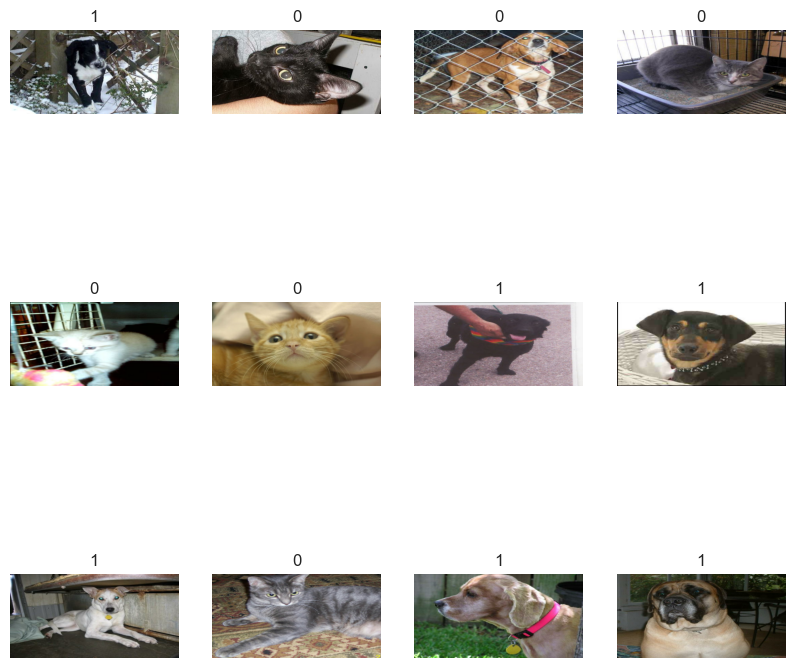

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds_1.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, int(i + 1))
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

### Augmentation

In [4]:
data_augmentation = keras.Sequential(
    [
        keras.layers.RandomFlip("horizontal"),
        keras.layers.RandomRotation(0.1),
    ]
)

In [5]:
for i in range(3):
    train_ds_1 = train_ds_1.map(
        lambda img, label: (data_augmentation(img), label)
    )

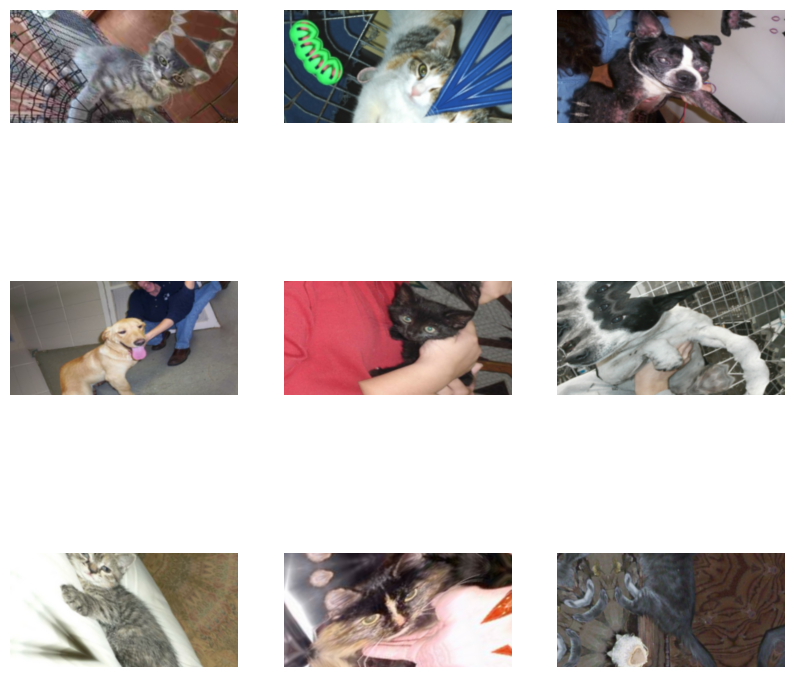

In [6]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds_1.take(4):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, int(i + 1))
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.axis("off")

### CNN

In [7]:
inputs = keras.Input(shape=(200, 400, 3))
x = keras.layers.Rescaling(1.0 / 255)(inputs)
x = keras.layers.Conv2D(128, 3, strides=4, padding="same")(x)
x = keras.layers.MaxPooling2D(3, strides=4, padding="same")(x)
x = keras.layers.Conv2D(256, 4, strides=4, padding="same")(x)
x = keras.layers.MaxPooling2D(3, strides=4, padding="same")(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(64, activation="relu")(x)
outputs = keras.layers.Dense(2, activation="softmax")(x)
model1 = keras.Model(inputs, outputs)

In [8]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 400, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 200, 400, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 50, 100, 128)      3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 25, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 4, 7, 256)         524544    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 1, 2, 256)         0         
 g2D)                                                        

In [9]:
model1.compile(optimizer=keras.optimizers.Adam(1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [10]:
model1.fit(train_ds_1, epochs=5, validation_data=test_ds_1)

Epoch 1/5
50/50 [==============================] - 22s 424ms/step - loss: 0.6936 - accuracy: 0.5631 - val_loss: 0.6875 - val_accuracy: 0.5375
Epoch 2/5
50/50 [==============================] - 21s 410ms/step - loss: 0.6775 - accuracy: 0.5625 - val_loss: 0.6626 - val_accuracy: 0.5500
Epoch 3/5
50/50 [==============================] - 21s 411ms/step - loss: 0.6919 - accuracy: 0.5431 - val_loss: 0.6899 - val_accuracy: 0.5125
Epoch 4/5
50/50 [==============================] - 21s 420ms/step - loss: 0.6790 - accuracy: 0.5638 - val_loss: 0.6466 - val_accuracy: 0.6125
Epoch 5/5
50/50 [==============================] - 21s 413ms/step - loss: 0.6691 - accuracy: 0.5831 - val_loss: 0.6809 - val_accuracy: 0.5825


In [11]:
img = keras.preprocessing.image.load_img(
    r"C:\Users\Capybaras\Desktop\data3\cats\4113.jpg", target_size=(200, 400)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, 0)

predictions = model1.predict(img_array)
print(np.around(predictions, 2))

1/1 [==============================] - 0s 65ms/step
array([[0.62, 0.38]], dtype=float32)


In [12]:
img = keras.preprocessing.image.load_img(
    r"C:\Users\Capybaras\Desktop\data3\dogs\132.jpg", target_size=(200, 400)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, 0)

predictions = model1.predict(img_array)
print(np.around(predictions, 2))

1/1 [==============================] - 0s 16ms/step
array([[0.47, 0.53]], dtype=float32)


### 3 classes: Аккордионы, гитары и дикие котики

In [13]:
train_ds_2, test_ds_2 = keras.utils.image_dataset_from_directory(
    r"C:\Users\Capybaras\Desktop\datapack",
    validation_split=0.15, 
    subset="both",
    seed=42, 
    image_size=(200,400), 
    batch_size=32, 
)

Found 164 files belonging to 3 classes.
Using 140 files for training.
Using 24 files for validation.


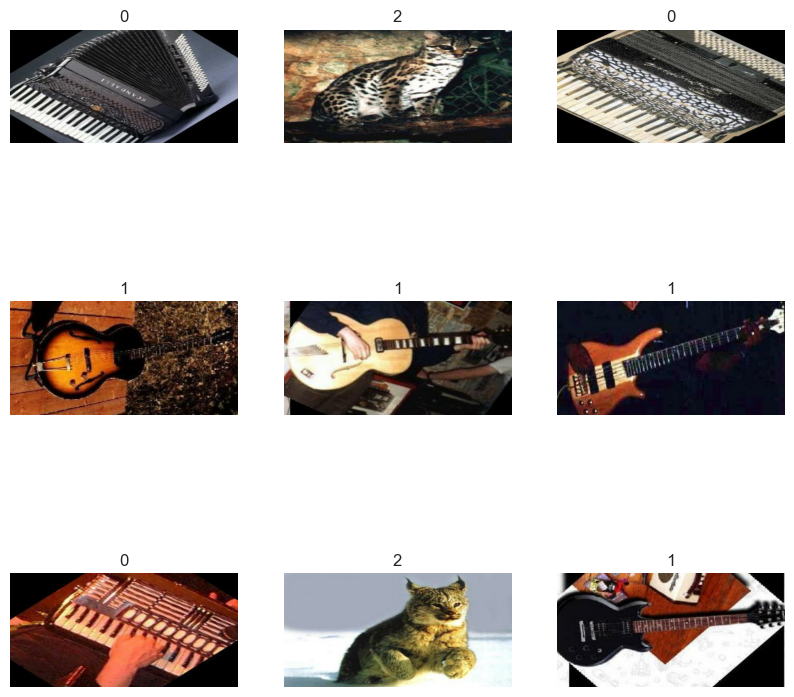

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds_2.take(3):
    for i in range(9):
        ax = plt.subplot(3, 3, int(i + 1))
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [15]:
data_augmentation = keras.Sequential(
    [
        keras.layers.RandomFlip("horizontal"),
        keras.layers.RandomRotation(0.1),
    ]
)

In [16]:
for i in range(4):
    train_ds_2 = train_ds_2.map(
        lambda img, label: (data_augmentation(img), label)
    )

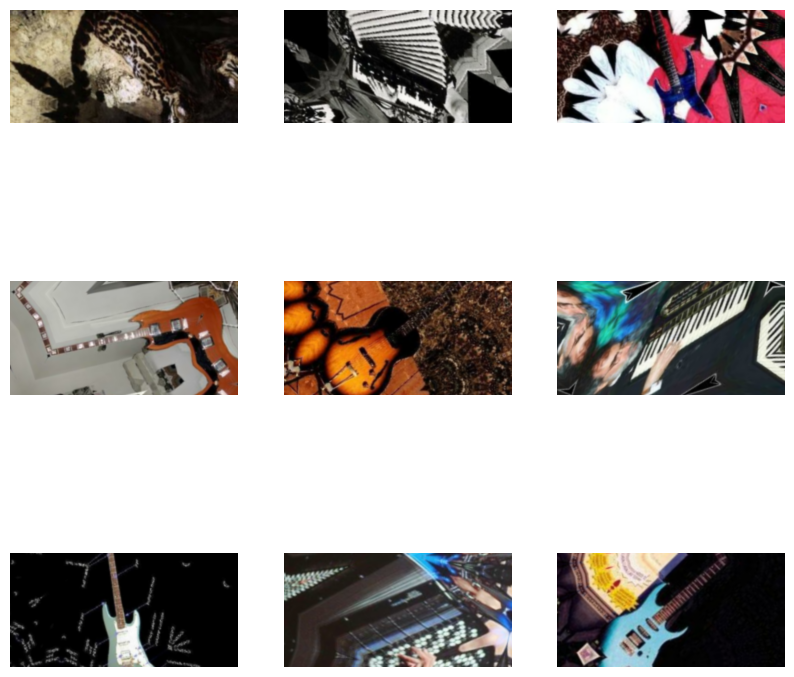

In [17]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds_2.take(4):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, int(i + 1))
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.axis("off")

In [18]:
inputs = keras.Input(shape=(200, 400, 3))
x = keras.layers.Rescaling(1.0 / 255)(inputs)
x = keras.layers.Conv2D(64, 3, strides=3, padding="same")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)
x = keras.layers.Conv2D(128, 4, strides=3, padding="same")(x)
x = keras.layers.MaxPooling2D(3, strides=3, padding="same")(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(64, activation="relu")(x)
outputs = keras.layers.Dense(3, activation="softmax")(x)
model2 = keras.Model(inputs, outputs)

In [19]:
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 200, 400, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 200, 400, 3)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 67, 134, 64)       1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 45, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 15, 128)        131200    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 3, 5, 128)         0         
 g2D)                                                      

In [20]:
model2.compile(optimizer=keras.optimizers.Adam(1e-3), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [21]:
model2.fit(train_ds_2, epochs=25, validation_data=test_ds_2)

Epoch 1/25
5/5 [==============================] - 3s 462ms/step - loss: 1.1760 - accuracy: 0.4071 - val_loss: 1.1465 - val_accuracy: 0.2500
Epoch 2/25
5/5 [==============================] - 2s 448ms/step - loss: 1.0465 - accuracy: 0.3929 - val_loss: 0.8999 - val_accuracy: 0.6667
Epoch 3/25
5/5 [==============================] - 2s 445ms/step - loss: 1.0320 - accuracy: 0.4143 - val_loss: 0.8764 - val_accuracy: 0.7083
Epoch 4/25
5/5 [==============================] - 2s 445ms/step - loss: 0.9767 - accuracy: 0.5071 - val_loss: 0.7832 - val_accuracy: 0.7917
Epoch 5/25
5/5 [==============================] - 2s 448ms/step - loss: 0.9505 - accuracy: 0.4571 - val_loss: 0.7238 - val_accuracy: 0.7917
Epoch 6/25
5/5 [==============================] - 2s 445ms/step - loss: 0.8965 - accuracy: 0.6143 - val_loss: 0.6140 - val_accuracy: 0.7500
Epoch 7/25
5/5 [==============================] - 2s 444ms/step - loss: 0.8562 - accuracy: 0.6071 - val_loss: 0.7049 - val_accuracy: 0.6250
Epoch 8/25
5/5 [====

In [22]:
img = keras.preprocessing.image.load_img(
    r"C:\Users\Capybaras\Desktop\datapack\accordion\image_0037.jpg", target_size=(200, 400)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, 0)

predictions = model2.predict(img_array)

print(np.around(predictions, 3))

1/1 [==============================] - 0s 45ms/step
array([[0.999, 0.   , 0.001]], dtype=float32)


In [23]:
img = keras.preprocessing.image.load_img(
    r"C:\Users\Capybaras\Desktop\datapack\wild_cat\image_0012.jpg", target_size=(200, 400)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, 0)

predictions = model2.predict(img_array)
print(np.around(predictions, 3))

1/1 [==============================] - 0s 13ms/step
array([[0.205, 0.001, 0.794]], dtype=float32)


In [24]:
img = keras.preprocessing.image.load_img(
    r"C:\Users\Capybaras\Desktop\datapack\electric_guitar\image_0045.jpg", target_size=(200, 400)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, 0)

predictions = model2.predict(img_array)
print(np.around(predictions, 3))

1/1 [==============================] - 0s 14ms/step
array([[0.053, 0.696, 0.251]], dtype=float32)


In [25]:
model2.save("./models/lab8/model_3_classes_ishak")

FailedPreconditionError: . is not a directory